## PyBioNetGen - a simple CLI for BioNetGen models

In [1]:
import bionetgen
import matplotlib.pyplot as plt

Convenient way to install bionetgen and quickly run models either from the command line or 
via python scripting. 

In [2]:
results = bionetgen.run("organelle_transport.bngl") # in temporary folder
# result_obj = bionetgen.run("organelle_transport.bngl", out=my_output) # in folder "my_output"

BioNetGen version 2.6.0
Reading from file /home/boltzmann/Workshop_2021/bionetgen/pybionetgen/organelle_transport.bngl (level 0)
Read 28 parameters.
Read 5 compartments.
Read 9 molecule types.
Read 4 species.
Read 4 observable(s).
Read 7 reaction rule(s).
ACTION: generate_network( organelle_transport )
Iteration   0:     4 species      0 rxns  0.00e+00 CPU s
Iteration   1:     5 species      1 rxns  0.00e+00 CPU s
Iteration   2:     6 species      3 rxns  2.00e-02 CPU s
Iteration   3:     7 species      4 rxns  0.00e+00 CPU s
Iteration   4:     8 species      5 rxns  0.00e+00 CPU s
Iteration   5:     9 species      7 rxns  0.00e+00 CPU s
Iteration   6:    10 species      8 rxns  0.00e+00 CPU s
Iteration   7:    11 species     10 rxns  1.00e-02 CPU s
Iteration   8:    11 species     10 rxns  0.00e+00 CPU s
Cumulative CPU time for each rule
Rule   1:     2 reactions 2.00e-02 CPU s 1.00e-02 CPU s/rxn
Rule   2:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Rule   3:     1 reactions 0.0

PyBNG automatically reads the gdat output file and returns a results object. 

In [4]:
print(results)

gdats from 1 models: organelle_transport
cdats from 1 models: organelle_transport


Gives the names of the files loaded

In [6]:
results.gdats["organelle_transport"] # you can look at gdats file via the gdats attribute

rec.array([(0.00e+00, 1200., 1000.,   0.,   0.),
           (1.00e-05, 1199., 1000.,   0.,   0.),
           (2.00e-05, 1198.,  999.,   1.,   0.), ...,
           (9.98e-03,  396.,  196., 488., 315.),
           (9.99e-03,  396.,  196., 488., 315.),
           (1.00e-02,  396.,  196., 487., 316.)],
          dtype=[('time', '<f8'), ('A', '<f8'), ('B', '<f8'), ('C', '<f8'), ('D', '<f8')])

Results attribute contains the numpy record arrays constructed from gdat files.

In [7]:
results[0] # or by indexing which defaults to gdat files

rec.array([(0.00e+00, 1200., 1000.,   0.,   0.),
           (1.00e-05, 1199., 1000.,   0.,   0.),
           (2.00e-05, 1198.,  999.,   1.,   0.), ...,
           (9.98e-03,  396.,  196., 488., 315.),
           (9.99e-03,  396.,  196., 488., 315.),
           (1.00e-02,  396.,  196., 487., 316.)],
          dtype=[('time', '<f8'), ('A', '<f8'), ('B', '<f8'), ('C', '<f8'), ('D', '<f8')])

In [8]:
results.cdats["organelle_transport"] # for other data files you need to manually select them

rec.array([(0.00e+00, 1200., 1000., 700., 700., 0.,  0.,  0., 0.,   0., 0.,   0.),
           (1.00e-05, 1198., 1000., 699., 700., 1.,  1.,  0., 0.,   0., 0.,   0.),
           (2.00e-05, 1196.,  999., 699., 700., 1.,  2.,  1., 0.,   0., 0.,   0.),
           ...,
           (9.98e-03,  379.,  196., 700., 699., 0., 17., 46., 0., 442., 1., 315.),
           (9.99e-03,  379.,  196., 700., 699., 0., 17., 46., 0., 442., 1., 315.),
           (1.00e-02,  379.,  196., 700., 699., 0., 17., 45., 0., 442., 1., 316.)],
          dtype=[('time', '<f8'), ('S1', '<f8'), ('S2', '<f8'), ('S3', '<f8'), ('S4', '<f8'), ('S5', '<f8'), ('S6', '<f8'), ('S7', '<f8'), ('S8', '<f8'), ('S9', '<f8'), ('S10', '<f8'), ('S11', '<f8')])

This is useful for quick plotting of observables.

In [9]:
r = results[0] # let's get the gdat record array

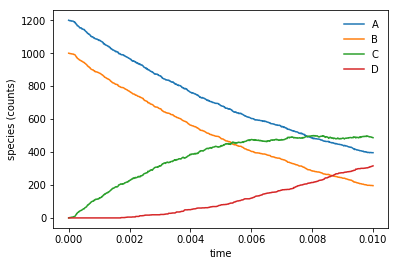

In [10]:
plt.plot(r['time'], r['A'], label="A")
plt.plot(r['time'], r['B'], label="B")
plt.plot(r['time'], r['C'], label="C")
plt.plot(r['time'], r['D'], label="D")
plt.xlabel("time")
plt.ylabel("species (counts)")
_ = plt.legend(frameon=False)

PyBNG also comes with a simple BNGL parsing capabilities. We are working on a much better parsing solution using C++ and that will become the default way to parse models in the future. This parsing creates a simple model object that allows some very basic manipulation and programmatic reading of the model.

In [40]:
model = bionetgen.bngmodel("organelle_transport.bngl")


BioNetGen version 2.6.0
--------------------------------------------------/ HELP MENU /-----
SYNOPSIS
process MODEL:      BNG2.pl [OPTION]... MODEL...
start BNG console:  BNG2.pl --console
display help:       BNG2.pl -h
display version:    BNG2.pl -v

OPTIONS
--log          write log to file MODEL.log (default is STDOUT)
--xml          write XML output after processing MODEL
--mfile        write MATLAB M-file output after processing MODEL
--sbml         write SBML output after processing MODEL
--check        read MODEL, but do not execute actions
--outdir PATH  change default output path

For more information, visit bionetgen.org
--------------------------------------------------------------------
Attempting to generate XML
Parsing
Parsing complete


This model object is written with BNGL in mind, so printing the model or individual blocks will give you the BNGL of that portion of the model.

In [22]:
print(model)

begin model

begin parameters
  NA_um3 6.02e+8
  d 0.01
  vol_CYT 1
  vol_O1M 1*d
  vol_O1V 0.133
  vol_O2M 1*d
  vol_O2V 0.0335
  kp_AB 1e9/NA_um3
  kp_AT1 1e8/NA_um3
  km_AT1 10
  k_AT1trans 100000
  kp_CT1 1e8/NA_um3
  km_CT1 10
  k_CT1trans 100000
  kp_CT2 1e8/NA_um3
  km_CT2 10
  k_DT2trans 100000
  D_VOL 1e-6
  D_SURF 1e-8
  MCELL_DIFFUSION_CONSTANT_3D_A D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_B D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_C D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_D D_VOL
  MCELL_DIFFUSION_CONSTANT_2D_T1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_AT1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_CT1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_T2 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_CT2 D_SURF
end parameters

begin compartments
  CYT 3 1
  O1M 2 0.01 CYT
  O1V 3 0.133 O1M
  O2M 2 0.01 CYT
  O2V 3 0.0335 O2M
end compartments

begin molecule types
  A()
  AT1()
  B()
  C()
  CT1()
  CT2()
  D()
  T1()
  T2()
end molecule types

begin species
  @CYT:A()@CYT 1200
  @O1V:B()@O1V 1000
  @O1M:T1()@O1M 700
  @

In [23]:
print(model.parameters)


begin parameters
  NA_um3 6.02e+8
  d 0.01
  vol_CYT 1
  vol_O1M 1*d
  vol_O1V 0.133
  vol_O2M 1*d
  vol_O2V 0.0335
  kp_AB 1e9/NA_um3
  kp_AT1 1e8/NA_um3
  km_AT1 10
  k_AT1trans 100000
  kp_CT1 1e8/NA_um3
  km_CT1 10
  k_CT1trans 100000
  kp_CT2 1e8/NA_um3
  km_CT2 10
  k_DT2trans 100000
  D_VOL 1e-6
  D_SURF 1e-8
  MCELL_DIFFUSION_CONSTANT_3D_A D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_B D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_C D_VOL
  MCELL_DIFFUSION_CONSTANT_3D_D D_VOL
  MCELL_DIFFUSION_CONSTANT_2D_T1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_AT1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_CT1 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_T2 D_SURF
  MCELL_DIFFUSION_CONSTANT_2D_CT2 D_SURF
end parameters



The model is also written with python in mind and the objects behave in a pythonic manner whenever possible.

In [25]:
for param in model.parameters:
    print(f"parameter name: {param}, value: {model.parameters[param]}")

parameter name: NA_um3, value: NA_um3 6.02e+8
parameter name: d, value: d 0.01
parameter name: vol_CYT, value: vol_CYT 1
parameter name: vol_O1M, value: vol_O1M 1*d
parameter name: vol_O1V, value: vol_O1V 0.133
parameter name: vol_O2M, value: vol_O2M 1*d
parameter name: vol_O2V, value: vol_O2V 0.0335
parameter name: kp_AB, value: kp_AB 1e9/NA_um3
parameter name: kp_AT1, value: kp_AT1 1e8/NA_um3
parameter name: km_AT1, value: km_AT1 10
parameter name: k_AT1trans, value: k_AT1trans 100000
parameter name: kp_CT1, value: kp_CT1 1e8/NA_um3
parameter name: km_CT1, value: km_CT1 10
parameter name: k_CT1trans, value: k_CT1trans 100000
parameter name: kp_CT2, value: kp_CT2 1e8/NA_um3
parameter name: km_CT2, value: km_CT2 10
parameter name: k_DT2trans, value: k_DT2trans 100000
parameter name: D_VOL, value: D_VOL 1e-6
parameter name: D_SURF, value: D_SURF 1e-8
parameter name: MCELL_DIFFUSION_CONSTANT_3D_A, value: MCELL_DIFFUSION_CONSTANT_3D_A D_VOL
parameter name: MCELL_DIFFUSION_CONSTANT_3D_B, v

In [35]:
for comp in model.compartments:
    c = model.compartments[comp]
    print(f"compartment name: {c.name}, dimensionality: {c.dim}, size: {c.size}")

compartment name: CYT, dimensionality: 3, size: 1
compartment name: O1M, dimensionality: 2, size: 0.01
compartment name: O1V, dimensionality: 3, size: 0.133
compartment name: O2M, dimensionality: 2, size: 0.01
compartment name: O2V, dimensionality: 3, size: 0.0335


Simple manipulations of the object is possible, particularly static values (e.g. parameter values, compartment sizes, initial species counts). This allows for some very simple analyses that can be done using this API. Please note that this is a fairly inefficient implementation for implementing complicated analyses since this process writes does a lot of file I/O. We will talk more about more efficient ways to implement analyses at the end.

BioNetGen version 2.6.0
Reading from file /home/boltzmann/Workshop_2021/bionetgen/pybionetgen/model.bngl (level 0)
Read 28 parameters.
Read 5 compartments.
Read 9 molecule types.
Read 4 species.
Read 4 observable(s).
Read 7 reaction rule(s).
ACTION: simulate( method=>"ssa" )
ACTION: generate_network( model )
Iteration   0:     4 species      0 rxns  0.00e+00 CPU s
Iteration   1:     5 species      1 rxns  0.00e+00 CPU s
Iteration   2:     6 species      3 rxns  0.00e+00 CPU s
Iteration   3:     7 species      4 rxns  2.00e-02 CPU s
Iteration   4:     8 species      5 rxns  0.00e+00 CPU s
Iteration   5:     9 species      7 rxns  0.00e+00 CPU s
Iteration   6:    10 species      8 rxns  0.00e+00 CPU s
Iteration   7:    11 species     10 rxns  1.00e-02 CPU s
Iteration   8:    11 species     10 rxns  0.00e+00 CPU s
Cumulative CPU time for each rule
Rule   1:     2 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Rule   2:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Rule   3:     1 reactio

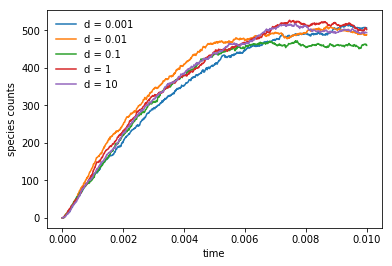

In [53]:
model.add_action("simulate", action_args=[("method","ssa"),("t_end",0.01),("n_steps",1000)])
for i in [0.001,0.01,0.1,1,10]:
    model.parameters.d = i
    model_name = f"model"
    model_file = model_name + ".bngl"
    with open(model_file, "w") as f:
        f.write(str(model))
    result = bionetgen.run(model_file)
    print(result.results)
    r = result.results[model_name]
    plt.plot(r['time'], r['C'], label=f"d = {i}")
plt.xlabel("time")
plt.ylabel("C (counts)")
plt.legend(frameon=False)